# Linear Regression

In a graph plotted on X-Y axis we get a best fit line equation
y = mx + c

where,
m = (mean(x).mean(y) - mean(xy))/(mean(x)^2 - mean(x^2))

c = mean(y) - m(mean(x))

Lets get into creating a simple linear regression algorithm

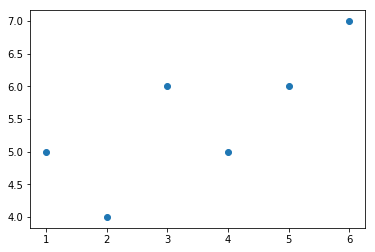

In [7]:
import matplotlib.pyplot as plt

x_values = [1, 2, 3, 4, 5, 6]
y_values = [5, 4, 6, 5, 6, 7]

plt.scatter(x_values, y_values)
plt.show()

In [9]:
#We will be working with numpy array - python does not has array
import numpy as np
from statistics import mean
x_values = np.array([1, 2, 3, 4, 5, 6], dtype = np.float64)
y_values = np.array([5, 4, 6, 5, 6, 7], dtype = np.float64)

def best_fit_slope(x_values, y_values):
    m = ((mean(x_values)*mean(y_values) - mean(x_values*y_values)) /
         ((mean(x_values)**2) - mean(x_values**2)))
    
    return m

m = best_fit_slope(x_values, y_values)
print(m)


0.428571428571


In [10]:
def best_fit_slope_and_intercept(x_values, y_values):
    m = ((mean(x_values)*mean(y_values) - mean(x_values*y_values)) /
         ((mean(x_values)**2) - mean(x_values**2)))
    
    b = mean(y_values) - m*mean(x_values)
    return m, b

m, b = best_fit_slope_and_intercept(x_values, y_values)

print(m, b)

0.428571428571 4.0


In [11]:
'''
for x in x_values:
    regression_line.append((m*x) + b)
'''

regression_line = [(m*x) + b for x in x_values]

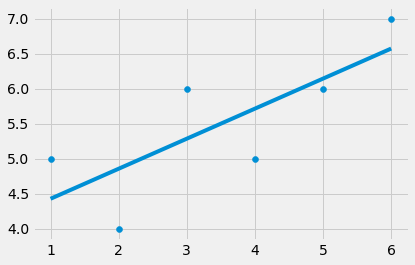

In [12]:
from matplotlib import style
style.use('fivethirtyeight')

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line)
plt.show()

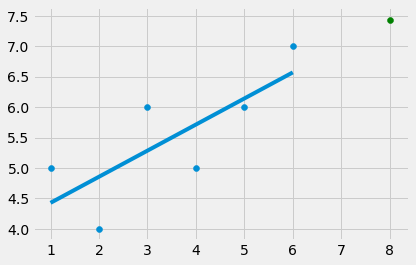

In [13]:
predict_x = 8
predict_y = (m*predict_x)+b

plt.scatter(x_values, y_values)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(x_values, regression_line)
plt.show()

Now our AIM is to find how good is this best fit line.
We gonna be checking the predicition accuracy for this line.

## R Squared Error

We square the errors because we want to penalize for outlyers. The more the point outlyes the more it is to be penalized.

r^2 = 1 - SE(y_predict)/SE(mean(y))

We want the r^2 value to be high. The higher the value the more accurate is our model.

In [14]:
def squared_error(y_values, y_lines):
    return sum((y_lines - y_values)**2)

def coefficient_of_determination(y_values, y_lines):
    y_mean_line = [mean(y_values) for y in y_values]
    squared_error_regr = squared_error(y_values, y_lines)
    squared_error_y_mean = squared_error(y_values, y_mean_line)
    
    return 1 - (squared_error_regr/squared_error_y_mean)

r_squared = coefficient_of_determination(y_values, regression_line)
print(r_squared)

0.584415584416


The more the value of the coefficient of regression the more accurate our best fit line is.

Now, we are going to test our algorithm.

In [33]:
import random

'''
count - How many datapoints we want to create
variance - The number of variables we want for the dataset
    #The less the variance the more the tighter the best fit line is

step - Step up y values
correlation - positive/negative/none
    #False correlation gives a pretty ugly result
'''
def create_dataset(dataset_count, variance, step=2, correlation=False):
    val = 1 #This is the first value for y
    y_values = [] # Empty y list
    for i in range(dataset_count):
        y = val + random.randrange(-variance, variance)
        y_values.append(y)
        
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
            
    x_values = [i for i in range(len(y_values))]
    
    return np.array(x_values, dtype=np.float64), np.array(y_values, dtype=np.float64)

x_values, y_values = create_dataset(40, 40, 2, correlation='pos')
print(x_values)
print(y_values)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.]
[  -1.   28.   26.   15.   12.    4.  -10.   39.    3.    8.   43.   -3.
  -15.   48.   11.   20.   37.   27.   44.   24.   37.   77.   43.   24.
   38.   23.   46.   52.   20.   74.   47.   45.   56.   60.   98.   53.
   86.   68.   39.  109.]


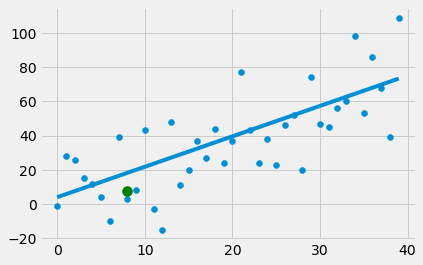

In [35]:
m = best_fit_slope(x_values, y_values)
regression_line = [(m*x) + b for x in x_values]

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line)
plt.scatter(predict_x, predict_y, s=100, color='g')
plt.show()

r_squared = coefficient_of_determination(y_values, regression_line)

In [36]:
print(r_squared) #The accuracy factor of our data set

0.531437923778


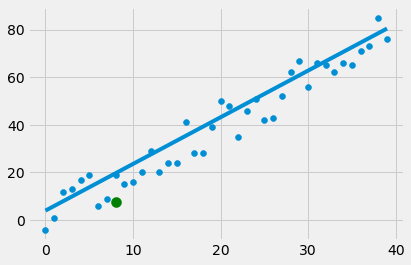

0.918954867435


In [39]:
#With lesser variance
x_values, y_values = create_dataset(40, 10, 2, correlation='pos')

m = best_fit_slope(x_values, y_values)
regression_line = [(m*x) + b for x in x_values]

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line)
plt.scatter(predict_x, predict_y, s=100, color='g')
plt.show()

r_squared = coefficient_of_determination(y_values, regression_line)
print(r_squared)

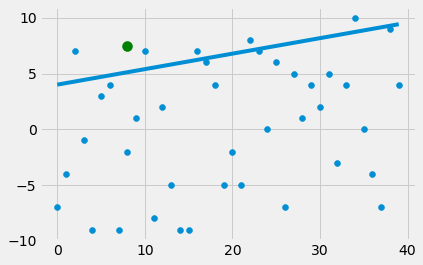

-1.18738246307


In [41]:
#With false correlation
x_values, y_values = create_dataset(40, 10, 2, correlation=False)

m = best_fit_slope(x_values, y_values)
regression_line = [(m*x) + b for x in x_values]

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line)
plt.scatter(predict_x, predict_y, s=100, color='g')
plt.show()

r_squared = coefficient_of_determination(y_values, regression_line)
print(r_squared)